# Visualize documents and their differences

In [14]:
import ipykernel
ipykernel.get_connection_file()

'/run/user/1000/jupyter/kernel-9c4b4585-c06c-43a3-a97e-d5226909080e.json'

## Utility functions

In [6]:
from sklearn.manifold import TSNE
import gensim
from loadCorpus import loadModel
from random import randint
import matplotlib

def drawEmbeddingSamples(num=1000, model=None):
    if not isinstance(model, gensim.models.doc2vec.Doc2Vec):
        model = loadModel(dim=600)
    doctags = list(model.docvecs.doctags)
    randomSamples = [doctags[randint(0, len(doctags)-1)] for _ in range(num)]
    return [model.docvecs[x] for x in randomSamples]

def tsne(docs):
    # calulate the t-SNE representation
    tsne = TSNE(n_components=2, random_state=0)
    return tsne.fit_transform(docs)

def randomColors(N=5, candidates=list(matplotlib.colors.cnames.keys())):
    return [candidates[randint(0, len(candidates)-1)] for _ in range(N)]

## Load the model and pick the desired documents

In [16]:
from loadCorpus import loadModel
model = loadModel(dim=600)
#X,y = loadCorpus(dim=100, model=model)

fuest2007 = model.docvecs['550246665.pdf']
fuest1999 =  model.docvecs['cesifo_wp215.pdf']
sinn2007 = model.docvecs['555918033.PDF']
sinn2000 = model.docvecs['cesifo_wp307.pdf']

### Fuest's difference +/- Sinn's documents

In [21]:
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean

numSamples = 5000

fuestDiff = fuest1999 - fuest2007
# snm -> Sinn, New, Minus fuestDiff
# som -> Sinn, Old, Minus fuestDiff
# ...
snm = sinn2007 - fuestDiff
som = sinn2000 - fuestDiff
snp = sinn2007 + fuestDiff
sop = sinn2000 + fuestDiff

docVecsSmF = [snm, som, snp, sop, fuestDiff, fuest2007, fuest1999, \
                 sinn2007, sinn2000]
docVecsSmFMapping = ['snm', 'som', 'snp', 'sop', 'fuest2007 - fuest1999', \
                        'fuest2007', 'fuest1999', 'sinn2007', 'sinn2000']
docVecsSmFColors = ['red'] * 4 + ['yellow', 
                                     '#00ccff', # light blue
                                     '#0000cc', # blue
                                     '#66ff33', # light green
                                     '#39ac73'] # green

randomSamples = drawEmbeddingSamples(numSamples, model=model)

docs = docVecsSmF + randomSamples
docColors = docVecsSmFColors + ['black'] * numSamples

In [19]:
tsneDocs = tsne(docs)

Populating the interactive namespace from numpy and matplotlib


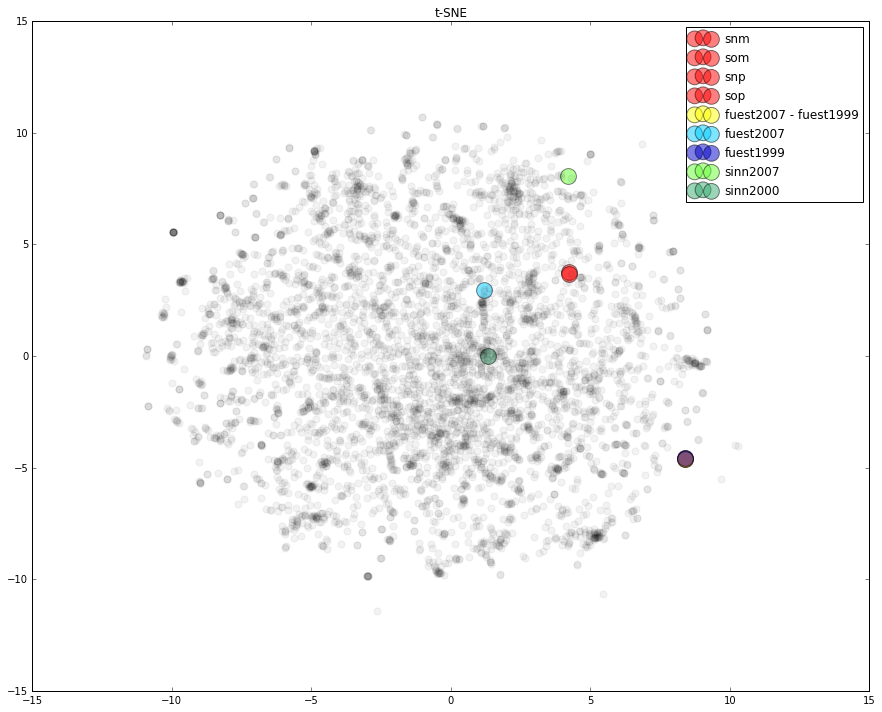

In [22]:
# t-SNE
%pylab inline
import matplotlib.pyplot as plt
from numpy.linalg import norm

tsneIfo = tsneDocs[:len(docVecsSmF), :]
tsneSamples = tsneDocs[len(docVecsSmF):, :]

handles = []
plt.figure(figsize=(15, 12), dpi=100)
for docVecs, c in zip(tsneIfo, docColors):
    handles.append(plt.scatter(docVecs[0], docVecs[1], s=250,\
                   c=c, alpha=.5, cmap=plt.cm.Spectral))

handles.append(plt.scatter(tsneSamples[:, 0], tsneSamples[:, 1], s=50, c='black',\
                           alpha=.05, cmap=plt.cm.Spectral))
plt.title("t-SNE")
plt.legend(handles, docVecsSmFMapping)

plt.show()

### Sinn's difference +/- Fuest's documents

In [24]:
sinnDiff = sinn2000 - sinn2007
fnm = fuest2007 - sinnDiff
fom = fuest1999 - sinnDiff
fnp = fuest2007 + sinnDiff
fop = fuest1999 + sinnDiff

docVecsFmS = [fnm, fom, fnp, fop, fuestDiff, fuest2007, fuest1999, \
                sinn2007, sinn2000]
docVecsFmSMapping = ['fnm', 'fom', 'fnp', 'fop', 'sinn2000 - sinn2007', \
                        'fuest2007', 'fuest1999', 'sinn2007', 'sinn2000']
docVecsFmSColors = ['red'] * 4 + ['yellow', 
                                     '#00ccff', # light blue
                                     '#0000cc', # blue
                                     '#66ff33', # light green
                                     '#39ac73'] # green

randomSamples = drawEmbeddingSamples(numSamples, model=model)

docs = docVecsFmS + randomSamples
docColors = docVecsFmSColors + ['black'] * numSamples

In [25]:
tsneDocs = tsne(docs)

Populating the interactive namespace from numpy and matplotlib


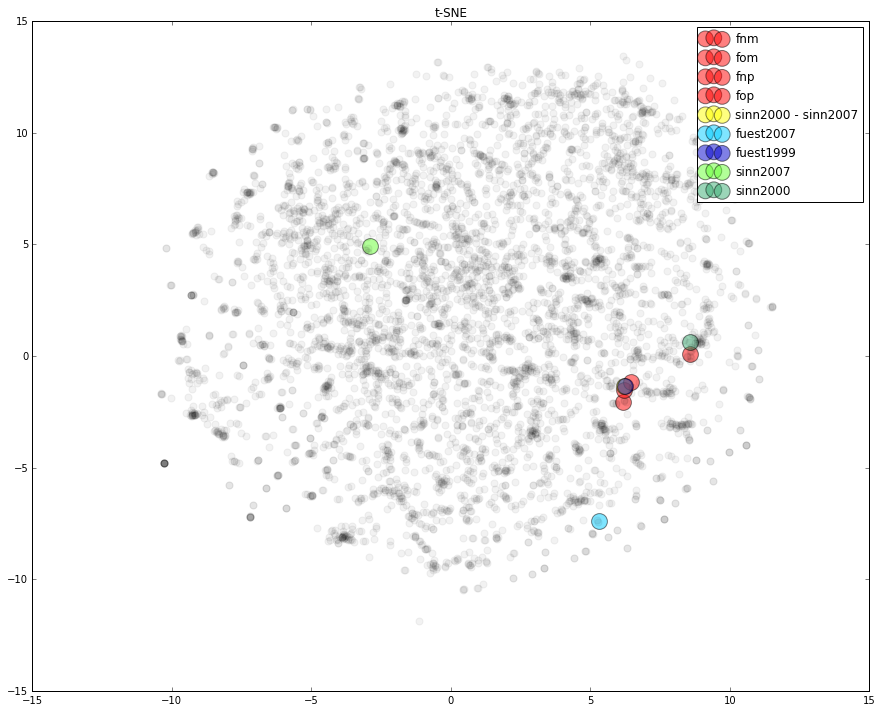

In [26]:
# t-SNE
%pylab inline
import matplotlib.pyplot as plt
from numpy.linalg import norm

tsneIfo = tsneDocs[:len(docVecsFmS), :]
tsneSamples = tsneDocs[len(docVecsFmS):, :]

handles = []
plt.figure(figsize=(15, 12), dpi=100)
for docVecs, c in zip(tsneIfo, docColors):
    handles.append(plt.scatter(docVecs[0], docVecs[1], s=250,\
                   c=c, alpha=.5, cmap=plt.cm.Spectral))

handles.append(plt.scatter(tsneSamples[:, 0], tsneSamples[:, 1], s=50, c='black',\
                           alpha=.05, cmap=plt.cm.Spectral))
plt.title("t-SNE")
plt.legend(handles, docVecsFmSMapping)

plt.show()

# t-SNE by authors

In [4]:
topUSAuthors = {
    'James J. Heckman': {
        'color': 'red',
        'tsne': [],
        'docs': ["791344649.pdf.json",
            "wp03-04.pdf.json",
            "664338003.pdf.json",
            "dp8827.pdf.json",
            "728401312.pdf.json",
            "dp8027.pdf.json",
            "cesifo_wp1031.pdf.json",
            "dp8711.pdf.json",
            "dp7750.pdf.json",
            "732416388.pdf.json",
            "558854818.pdf.json",
            "wp03-13.pdf.json",
            "632184426.pdf.json",
            "632185252.pdf.json",
            "490361323.pdf.json",
            "cesifo_wp1014.pdf.json",
            "dp7550.pdf.json",
            "732553164.pdf.json",
            "66523810X.pdf.json",
            "362526656.pdf.json",
            "374816565.pdf.json",
            "dp7628.pdf.json",
            "490471781.pdf.json",
            "687928893.pdf.json",
            "484623192.pdf.json",
            "801006074.pdf.json",
            "717449475.pdf.json",
            "dp8200.pdf.json",
            "675944805.pdf.json",
            "dp9476.pdf.json",
            "wp02-02.pdf.json",
            "wp03-09.pdf.json",
            "801004721.pdf.json",
            "715979043.pdf.json",
            "665267223.pdf.json",
            "749691735.pdf.json",
            "632183454.pdf.json",
            "idb-wp_430.pdf.json",
            "716017407.pdf.json",
            "dp7552.pdf.json",
            "wp03-17.pdf.json",
            "pp17.pdf.json",
            "dp9247.pdf.json",
            "558856314.pdf.json",
            "727557017.pdf.json",
            "dp8548.pdf.json",
            "757433537.pdf.json",
            "dp8424.pdf.json",
            "659505134.pdf.json",
            "dp8338.pdf.json",
            "dp8696.pdf.json",
            "664348866.pdf.json",
            "663112346.pdf.json",
            "wp1408.pdf.json",
            "607538317.pdf.json",
            "362626855.pdf.json",
            "638495555.pdf.json"]
    },
    'Barry Julian Eichengreen': {
        'color': 'fuchsia',
        'tsne': [],
        'docs': ["730571912.pdf.json",
            "wp-004.pdf.json",
            "idb-wp_558.pdf.json",
            "360795722.pdf.json",
            "510276172.pdf.json",
            "796867208.pdf.json",
            "77656370X.pdf.json",
            "ewp-262.pdf.json",
            "656407387.pdf.json",
            "590225650.PDF.json",
            "61801697X.pdf.json",
            "642338310.pdf.json",
            "729180689.pdf.json"],
    },
    'Daron Acemoglu': {
        'color': 'gold',
        'tsne': [],
        'docs': ["477687644.pdf.json",
            "686844475.pdf.json",
            "833124862.pdf.json",
            "dp9068.pdf.json",
            "612963969.pdf.json",
            "567037134.pdf.json",
            "dp7906.pdf.json",
            "cesifo_wp5366.pdf.json",
            "VfS_2010_pid_558.pdf.json"]
    },
    'Joseph E. Stiglitz': {
        'color': 'sienna',
        'tsne': [],
        'docs': ["640462014.pdf.json",
            "576782793.pdf.json",
            "309202949.pdf.json",
            "51214043X.pdf.json",
            "771928769.pdf.json",
            "826742238.pdf.json"]
    },
    'Christopher F Baum': {
        'color': 'blue',
        'tsne': [],
        'docs': ["dp633.pdf.json",
            "dp634.pdf.json",
            "dp638.pdf.json",
            "dp410.pdf.json",
            "623004666.pdf.json",
            "772388652.pdf.json",
            "dp635.pdf.json",
            "dp443.pdf.json",
            "dp0410.pdf.json",
            "diw_finess_03030.pdf.json",
            "595251412.PDF.json",
            "606801979.pdf.json"]
    },
    'Carmen M. Reinhart': {
        'color': 'darkgoldenrod',
        'tsne': [],
        'docs': ["cesifo_wp5422.pdf.json",
            "idb-wp_457.pdf.json",
            "idb-wp_458.pdf.json",
            "732720230.pdf.json",
            "lmu-mdp_2014-49.pdf.json",
            "idb-wp_302.pdf.json",
            "687820979.pdf.json"]
    },
    'Thomas J. Sargent': {
        'color': 'white',
        'tsne': [],
        'docs': ["wp2003-14.pdf.json",
            "200528dkp.pdf.json",
            "wp2003-25.pdf.json",
            "383913152.PDF.json",
            "505119463.pdf.json",
            "wp481.pdf.json",
            "505119412.pdf.json",
            "wp2005-09.pdf.json",
            "82835975X.pdf.json",
            "wp2004-22.pdf.json",
            "591928027.pdf.json",
            "572292899.pdf.json"]
    },
    'M Hashem Pesaran': {
        'color': 'green',
        'tsne': [],
        'docs': ["736674640.pdf.json",
            "cesifo1_wp1599.pdf.json",
            "734622074.pdf.json",
            "cesifo_wp5428.pdf.json",
            "660761904.pdf.json",
            "666546231.pdf.json",
            "715801236.pdf.json",
            "59283526X.PDF.json",
            "cesifo_wp4508.pdf.json",
            "cesifo_wp995.pdf.json",
            "559866755.pdf.json",
            "604523742.pdf.json",
            "559459076.pdf.json",
            "555510999.pdf.json",
            "cesifo_wp4834.pdf.json",
            "720705274.pdf.json",
            "515328278.PDF.json",
            "538177373.PDF.json",
            "66205587X.pdf.json",
            "517049996.PDF.json",
            "568422740.PDF.json",
            "200627dkp.pdf.json",
            "cesifo_wp4371.pdf.json",
            "720581133.pdf.json",
            "cesifo_wp5434.pdf.json",
            "cesifo_wp990.pdf.json",
            "dp1196.pdf.json",
            "cesifo1_wp1425.pdf.json",
            "727117904.pdf.json",
            "548147493.pdf.json",
            "564825875.PDF.json",
            "cesifo_wp869.pdf.json",
            "IDB-WP-510.pdf.json",
            "551460059.pdf.json",
            "68520281X.pdf.json",
            "cesifo1_wp1650.pdf.json",
            "538347554.PDF.json",
            "715937049.pdf.json",
            "cesifo1_wp1477.pdf.json",
            "51578544X.pdf.json",
            "715931490.pdf.json",
            "555968669.PDF.json",
            "cesifo_wp4592.pdf.json",
            "544121406.pdf.json",
            "55799005X.PDF.json",
            "717914593.pdf.json",
            "627338070.pdf.json",
            "559866593.pdf.json",
            "cesifo1_wp1416.pdf.json",
            "economics_2007-3.pdf.json",
            "dp1108.pdf.json",
            "617482330.pdf.json",
            "665579225.pdf.json",
            "551074620.pdf.json",
            "532017501.pdf.json",
            "715366505.pdf.json",
            "619071087.pdf.json",
            "cesifo1_wp1233.pdf.json",
            "570161258.PDF.json",
            "732540674.pdf.json",
            "dp1236.pdf.json",
            "cesifo1_wp1438.pdf.json",
            "626619505.pdf.json",
            "200542dkp.pdf.json",
            "517025035.PDF.json",
            "cesifo1_wp1548.pdf.json",
            "538034203.PDF.json",
            "cesifo1_wp1565.pdf.json",
            "cesifo1_wp1237.pdf.json",
            "cesifo_wp1176.pdf.json",
            "661602680.pdf.json",
            "514746963.pdf.json",
            "560540418.PDF.json",
            "529380676.PDF.json",
            "cesifo1_wp1531.pdf.json",
            "715726412.pdf.json",
            "cesifo_wp5410.pdf.json",
            "615085288.pdf.json",
            "cesifo1_wp1358.pdf.json",
            "71745228X.pdf.json",
            "cesifo1_wp1659.pdf.json",
            "cesifo_wp4433.pdf.json",
            "518893278.PDF.json",
            "cesifo1_wp1331.pdf.json",
            "52873816X.PDF.json",
            "cesifo_wp4983.pdf.json",
            "559087853.PDF.json",
            "538378069.pdf.json",
            "cesifo_wp4871.pdf.json",
            "587537787.pdf.json",
            "cesifo_wp4736.pdf.json",
            "cesifo_wp4822.pdf.json",
            "612935043.pdf.json",
            "cesifo_wp5367.pdf.json",
            "631014306.pdf.json",
            "559090684.PDF.json",
            "62965543X.pdf.json",
            "cesifo_wp1169.pdf.json",
            "cesifo_wp4232.pdf.json",
            "kap1366.pdf.json",
            "cesifo1_wp1229.pdf.json",
            "516953184.PDF.json",
            "dp1240.pdf.json",
            "690002343.pdf.json",
            "631381295.pdf.json",
            "685277747.pdf.json",
            "557255945.PDF.json",
            "615344860.pdf.json",
            "538294833.PDF.json",
            "cesifo_wp374.pdf.json",
            "548147248.pdf.json",
            "cesifo_wp4807.pdf.json",
            "659395266.pdf.json",
            "dp1313.pdf.json",
            "669983144.pdf.json",
            "669863831.pdf.json",
            "dp2007-7.pdf.json",
            "cesifo1_wp1308.pdf.json",
            "558342329.PDF.json"]
    }    
}

In [7]:
import itertools
from loadCorpus import loadModel

try:
    if not isinstance(model, gensim.models.doc2vec.Doc2Vec):
        model = loadModel(dim=600)
except NameError:
    model = loadModel(dim=600)

corpus = drawEmbeddingSamples(num=9000, model=model)

# flatten the datastructure to obtain all documents' file names
topUSAuthorsDocs = itertools.chain(*(author['docs'] \
                                     for author in list(topUSAuthors.values())))
topUSAuthorsDocs = list(map(lambda x: x.replace(".json", ""), topUSAuthorsDocs))
topUSAuthorsDocEmbeddings = [model.docvecs[doc] for doc in topUSAuthorsDocs]

# merging samples and the selected docs
corpus = list(itertools.chain(topUSAuthorsDocEmbeddings, corpus))

In [8]:
tsneCorpus = tsne(corpus)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


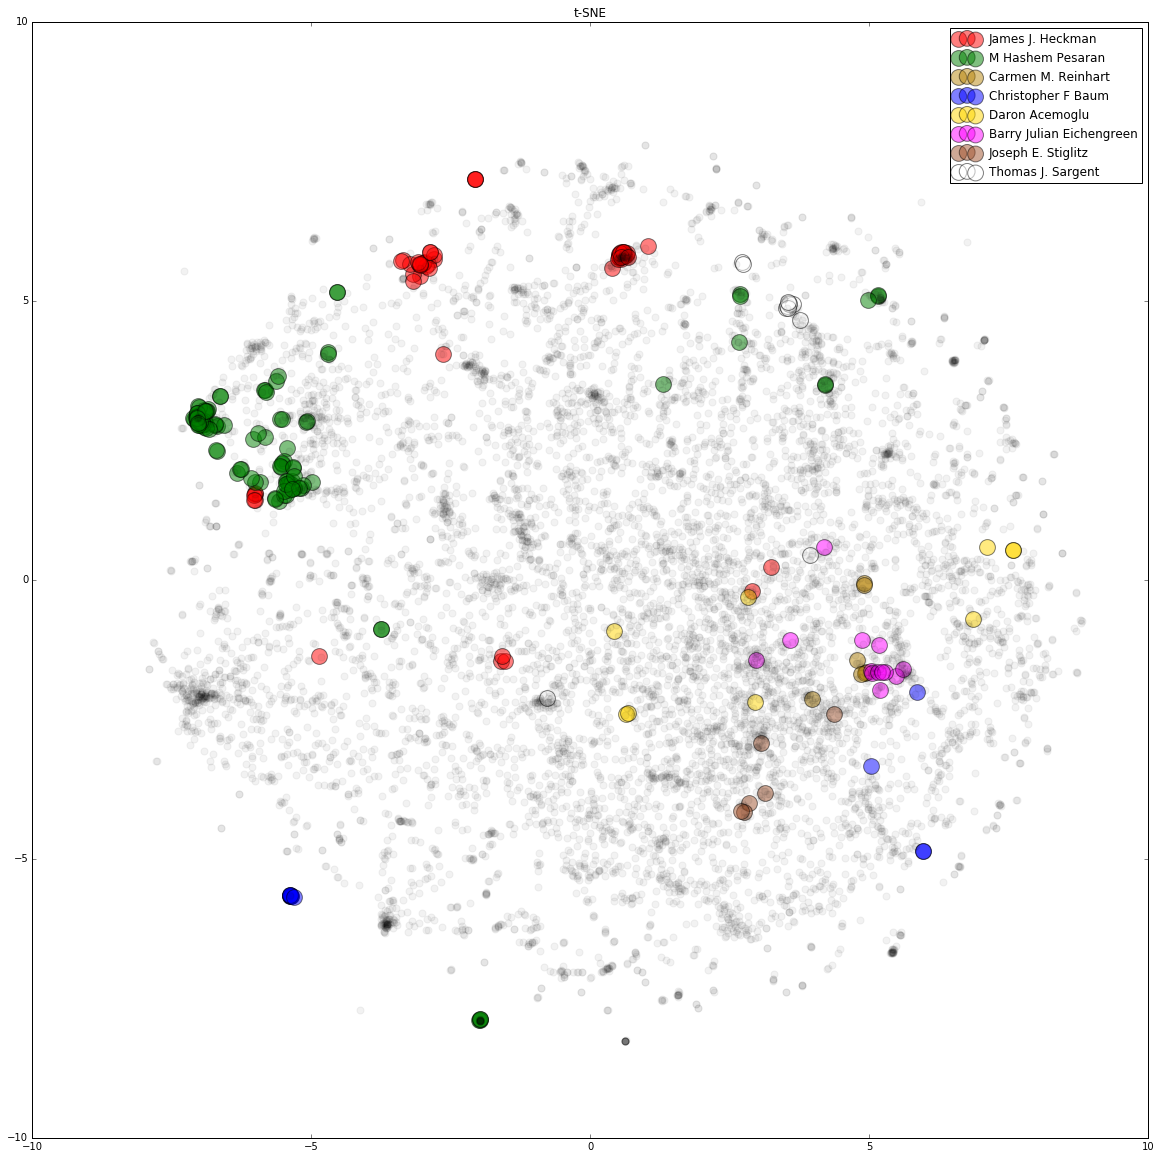

In [9]:
# plot the result
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

tsneUSAuthors = tsneCorpus[:len(topUSAuthorsDocs), :]
tsneSamples = tsneCorpus[len(topUSAuthorsDocs):, :]
preferedColors = ['green', 'mediumorchid', 'darkgoldenrod', 'blue', \
                  'sienna', 'gold', 'fuchsia', 'red', 'white']
# asign color to author and
# asign tsne representations to documents
docsProcessed = 0
for author, values in topUSAuthors.items():
    #values['color'] = randomColors(N=1, candidates=preferedColors)
    
    numDocs = len(values['docs'])
    values['tsne'] = tsneUSAuthors[docsProcessed:(docsProcessed+numDocs)]
    docsProcessed += numDocs
    
handles = []
plt.figure(figsize=(20, 20), dpi=100)
for author, values in topUSAuthors.items():
    handles.append(plt.scatter(values['tsne'][:, 0], values['tsne'][:, 1], s=250,\
                   c=values['color'], alpha=.5, cmap=plt.cm.Spectral))

handles.append(plt.scatter(tsneSamples[:, 0], tsneSamples[:, 1], s=50, c='black',\
                           alpha=.05, cmap=plt.cm.Spectral))
plt.title("t-SNE")
plt.legend(handles, [author for author in topUSAuthors.keys()])

plt.show()